In [12]:
import cv2
import numpy as np
import os
import csv
import time
import math
import matplotlib.pyplot as plt

In [3]:
def extract_bv(image):
    b,green_fundus,r = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_enhanced_green_fundus = clahe.apply(green_fundus)
    # applying alternate sequential filtering (3 times closing opening)
    r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
    r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
    r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
    R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
    f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
    f5 = clahe.apply(f4)

    # removing very small contours through area parameter noise removal
    ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)
    mask = np.ones(f5.shape[:2], dtype="uint8") * 255
    im2, contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if cv2.contourArea(cnt) <= 200:
            cv2.drawContours(mask, [cnt], -1, 0, -1)
    im = cv2.bitwise_and(f5, f5, mask=mask)
    ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)
    newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)

    # removing blobs of microaneurysm & unwanted bigger chunks taking in consideration they are not straight lines like blood
    # vessels and also in an interval of area
    fundus_eroded = cv2.bitwise_not(newfin)
    xmask = np.ones(image.shape[:2], dtype="uint8") * 255
    x1, xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in xcontours:
        shape = "unidentified"
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)
        if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
            shape = "circle"	
        else:
            shape = "veins"
        if(shape=="circle"):
            cv2.drawContours(xmask, [cnt], -1, 0, -1)

    finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)
    blood_vessels = cv2.bitwise_not(finimage)

    return blood_vessels

In [4]:
# pathFolder = "C:/Users/Ammu Vikas/Thesis credits_Fundus/new_method_hybrid/images/training/"
pathFolder = "testing/"

filesArray = [x for x in os.listdir(pathFolder) if os.path.isfile(os.path.join(pathFolder,x))]
# DestinationFolder = "C:/Users/Ammu Vikas/Thesis credits_Fundus/new_method_hybrid/images/training-results/"
# DestinationFolder = "C:/Users/Ammu Vikas/Thesis credits_Fundus/new_method_hybrid/images/training-results1/"
DestinationFolder = "testing-results1/"

if not os.path.exists(DestinationFolder):
    os.mkdir(DestinationFolder)

testing//image072.png Read this image image072


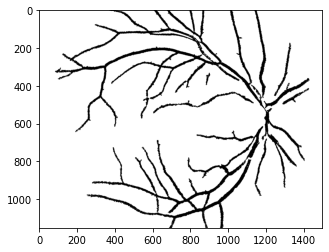

In [18]:
# for workshop 12_3_2021
for file_name in filesArray:
    file_name_no_extension = os.path.splitext(file_name)[0]
#     coordinates_OD = coordinates[name.index(file_name_no_extension+"_resized")]
    print(pathFolder+'/'+file_name,"Read this image",file_name_no_extension)
    fundus1 = cv2.imread(pathFolder+'/'+file_name)
    fundus1 = cv2.cvtColor(fundus1, cv2.COLOR_BGR2RGB)
#     plt.imshow(fundus1)
#     plt.show()
    
#     cv2.imshow('image1',fundus1)
#     cv2.waitKey(0)  
  
#  #closing all open windows  
#     cv2.destroyAllWindows()
#     break
#     fundus = cv2.resize(fundus1,(800,615))
#     fundus_mask = cv2.imread("fmask.tif")
#     fundus_mask = cv2.resize(fundus_mask,(800,615))
#     f1 = cv2.bitwise_and(fundus[:,:,0],fundus_mask[:,:,0])
#     f2 = cv2.bitwise_and(fundus[:,:,1],fundus_mask[:,:,1])
#     f3 = cv2.bitwise_and(fundus[:,:,2],fundus_mask[:,:,2])
#     fundus_dash = cv2.merge((f1,f2,f3))
# #     plt.imshow(fundus_dash)
# #     plt.show()
    

#     cv2.imwrite(DestinationFolder+file_name_no_extension+"_resized_fundus.bmp",fundus_dash)

#     b,g,r = cv2.split(fundus_dash)
#     hsv_fundus = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2HSV)
#     h,s,v = cv2.split(hsv_fundus)
#     gray_scale = cv2.cvtColor(fundus_dash,cv2.COLOR_BGR2GRAY)
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     contrast_enhanced_fundus = clahe.apply(gray_scale)
#     contrast_enhanced_green_fundus = clahe.apply(g)

#     average_intensity = get_average_intensity(contrast_enhanced_green_fundus)/255
#     average_hue = get_average_hue(h)/255
#     average_saturation = get_average_saturation(s)/255

    bv_image_dash1 = extract_bv(fundus1)
#     plt.imshow(bv_image_dash1,cmap='gray')
#     plt.show()
    cv2.imwrite(DestinationFolder+file_name_no_extension+"_blood_vessels.bmp",bv_image_dash1)